In [1]:
! pip install 'cebra[dev,demos]' 

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: No such file or directory
/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: exec: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: cannot execute: No such file or directory


In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
import cebra.datasets
from cebra import CEBRA
import d_library as dl
import sklearn.linear_model
from matplotlib.animation import FuncAnimation

from matplotlib.collections import LineCollection
import pandas as pd

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/lib/python3.11/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


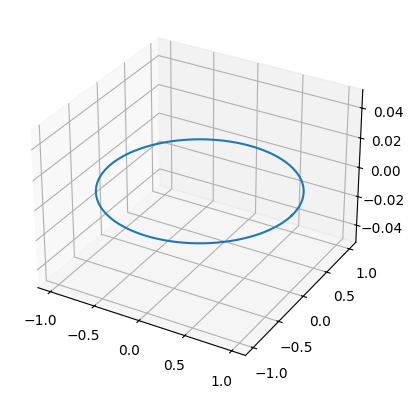

(100, 3)

In [3]:
%matplotlib inline
circle = dl.make_circle()
dl.plot_circle(circle[:,0], circle[:,1])
circle.shape

In [4]:
xyz = dl.make_lorenz()

In [5]:
xyz[0].shape

(10000,)

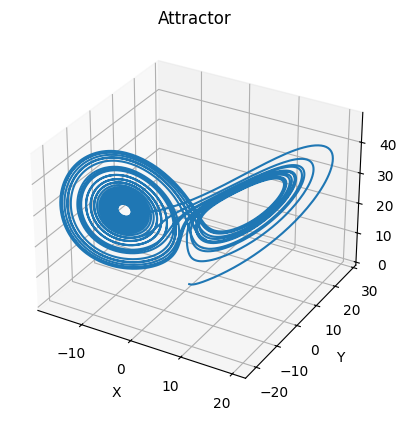

In [6]:
dl.plot_lorenz(xyz)

In [7]:
print(xyz.shape)
print(xyz[:,190])


(3, 10000)
[-6.60980422 -8.42031612 26.00175368]


In [8]:
new_lorenz = np.transpose(xyz)

In [9]:
new_lorenz[:10].shape

(10, 3)

In [10]:
print(new_lorenz.shape)
print(new_lorenz[190])

(10000, 3)
[-6.60980422 -8.42031612 26.00175368]


In [11]:
def reconstruction_score(x, y):

    def _linear_fitting(x, y):
        lin_model = sklearn.linear_model.LinearRegression()
        lin_model.fit(x, y)
        return lin_model.score(x, y), lin_model.predict(x)

    return _linear_fitting(x, y)

In [12]:
# behavioural label
b_label = np.random.rand(10000)

In [13]:
b_label_ = np.arange(0,10000,1)
b_label_

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [14]:
cebra_model = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='delta',
    output_dimension=3,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

In [15]:
cebra_model_2 = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='delta',
    output_dimension=2,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

pos: -167759086119550976.0000 neg: -6701596062207455526912.0000 total: -6701763821293575077888.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:22<00:00, 90.82it/s]  


linear reconstruction score: 0.9580594353971312


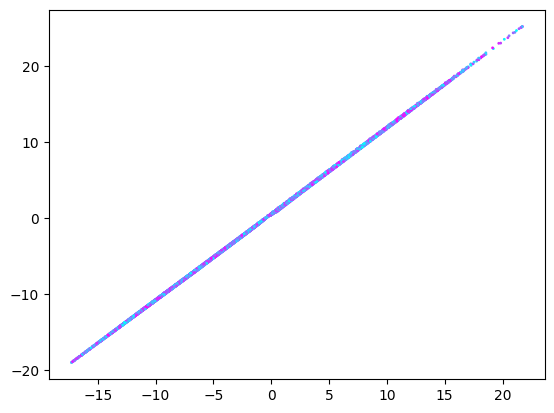

In [16]:
cebra_model_2.fit(new_lorenz[:8000], b_label_[:8000])

cebra_output_2 = cebra_model_2.transform(new_lorenz)
cebra_score_2, transformed_cebra_z_2 = reconstruction_score(cebra_output_2,
                                                        new_lorenz)

fig = plt.figure()
ax = fig.add_subplot()

print(f"linear reconstruction score: {cebra_score_2}")
ax.scatter(transformed_cebra_z_2[:, 0],
            transformed_cebra_z_2[:, 1],
            c=b_label,
            s=1,
            cmap='cool')
#plt.axis('off')

<Axes: title={'center': 'Embedding'}>

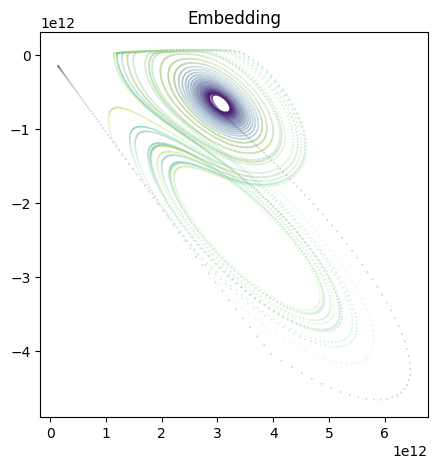

In [17]:
cebra.plot_embedding(cebra_output_2, embedding_labels='time')

In [18]:
cebra_model.fit(new_lorenz[:8000], b_label_[:8000])

  0%|          | 0/2000 [00:00<?, ?it/s]

pos: -729583139634020352.0000 neg: -55332035669806840545280.0000 total: -55332765252946474565632.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:21<00:00, 93.93it/s]


CEBRA(batch_size=512, conditional='delta', delta=0.1, distance='euclidean',
      learning_rate=0.01, max_iterations=2000,
      model_architecture='offset1-model-mse', num_hidden_units=64,
      output_dimension=3, verbose=True)

linear reconstruction score: 0.917551244909557


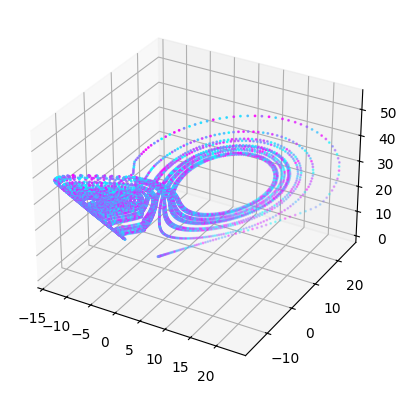

In [19]:
cebra_output = cebra_model.transform(new_lorenz)
cebra_score, transformed_cebra_z = reconstruction_score(cebra_output,
                                                        new_lorenz)

#plt.axis('off')

linear reconstruction score: 0.917551244909557


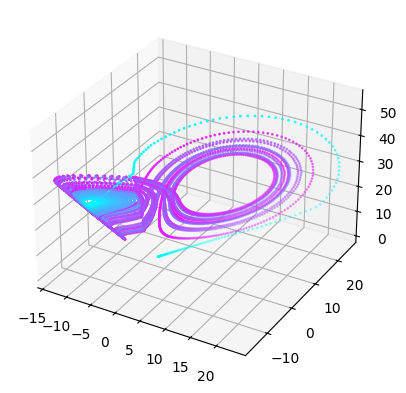

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(f"linear reconstruction score: {cebra_score}")
ax.scatter(transformed_cebra_z[:, 0],
            transformed_cebra_z[:, 1],
            transformed_cebra_z[:,2],
            c=b_label_,
            s=1,
            cmap='cool')

<Axes3D: title={'center': 'Embedding'}>

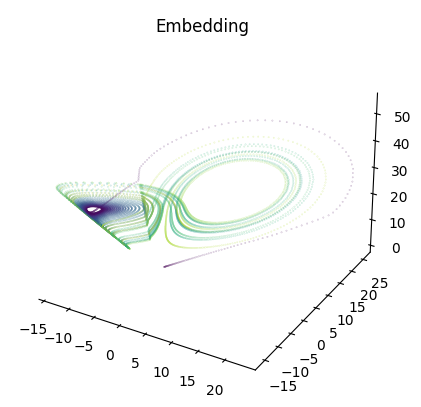

In [26]:
cebra.plot_embedding(transformed_cebra_z, embedding_labels='time')

Here, the lorenz attractor is embedded by CEBRA using a continuous auxiliary variable.

<Axes3D: title={'center': 'Embedding'}>

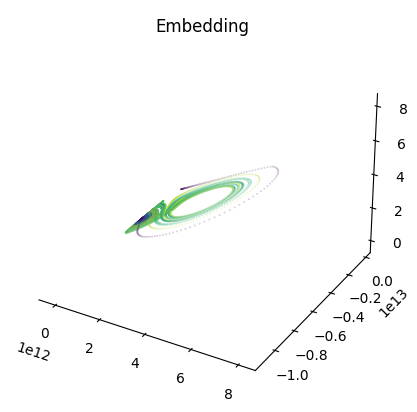

In [22]:
cebra.plot_embedding(cebra_output,embedding_labels='time')

<Axes3D: title={'center': 'Embedding'}>

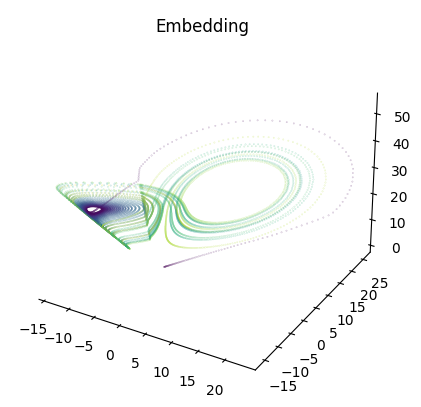

In [23]:
cebra.plot_embedding(transformed_cebra_z,embedding_labels='time')

<Axes: title={'center': 'Embedding'}>

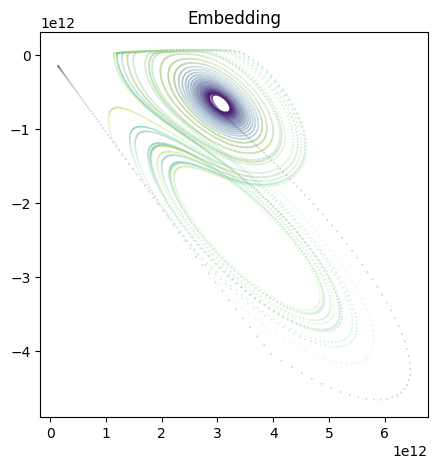

In [24]:
cebra.plot_embedding(cebra_output_2, embedding_labels='time')

In [25]:
new_lorenz[:100,:].shape

(100, 3)

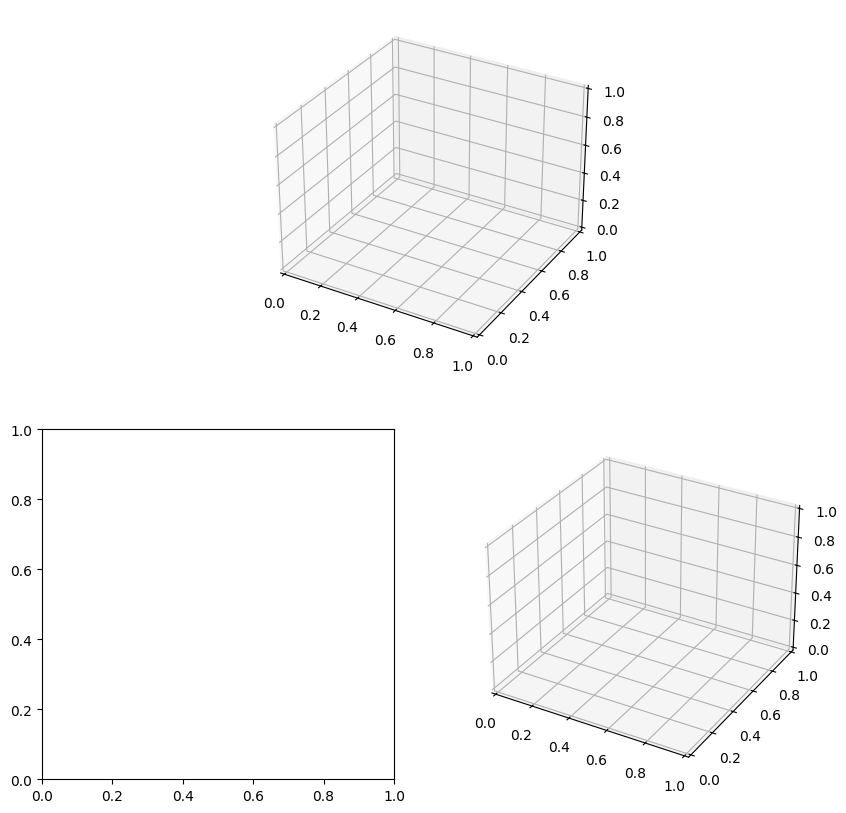

KeyboardInterrupt: 

In [28]:
# define the grid and axes
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 2, figure=fig) 
ax1 = plt.subplot(gs[0, :], projection='3d')
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1], projection='3d')

def update(frame):
        ax1.clear()
        ax2.clear()
        ax3.clear()

        attractor_p = new_lorenz[:frame, :]

        ax1.plot(attractor_p[:,0], attractor_p[:,1], attractor_p[:,2], alpha=1)
        ax1.set_title('Timestep {}'.format(frame))

        cebra.plot_embedding(embedding=cebra_output_2[:frame, :], embedding_labels= 'time', title='2D Embedding', markersize=5, ax=ax2)
        cebra.plot_embedding(embedding=cebra_output[:frame, :], embedding_labels='time', markersize=5, title='3D Embedding', ax=ax3)

anima = FuncAnimation(fig, update, frames=range(0, cebra_output.shape[0], 1), blit=False, interval=200, repeat=False)
plt.show()
anima.save("anima.gif", writer='pillow')

## Bad Data

So the problem was that I was reshaping the input data incorrectly.

In [3]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.plot(lorenz_obj[:,0], lorenz_obj[:,1], lorenz_obj[:,2])

NameError: name 'plt' is not defined

In [ ]:
cebra.plot_embedding(cebra_output)

In [1]:
from mpl_toolkits.mplot3d import Axes3D

# function to view the ideal embedding from different angles
def view_embed(ideal_embedding, n_angles=6):

    fig1=plt.figure(figsize=(8,4*n_angles))
    gs = gridspec.GridSpec(n_angles, 2, figure=fig1)

    for i, ii in enumerate(range(0,360,int(360/n_angles))):

        ax1 = fig1.add_subplot(gs[1*i,0], projection='3d')
        ax1.view_init(elev=10., azim=ii)
        cebra.plot_embedding(ideal_embedding, embedding_labels='time', ax=ax1, markersize=5, alpha=1, title='Circle: {}'.format(ii))

        ax2 = fig1.add_subplot(gs[1*i,1], projection='3d')
        ax2.view_init(elev=10., azim=ii)
        cebra.plot_embedding(ideal_embedding, embedding_labels='time',ax=ax2, markersize=0.001, alpha=1, title='Lorenz Attractor: {}'.format(ii))
        
        plt.tight_layout()

    plt.show()

In [2]:
view_embed(lorenz_obj)

NameError: name 'lorenz_obj' is not defined